<a href="https://colab.research.google.com/github/naxatra2/Route-Optimization-/blob/main/Final_Transport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import pandas as pd
import numpy as np
import math
import os
import networkx as nx
import matplotlib.pyplot as plt

**NetworkX** is a package for the Python programming language that's used to create, manipulate, and study the structure, dynamics, and functions of complex graph networks.
networkx also provides functions to calculate various centrality metrics, such as betweenness centrality, closeness centrality, and eigenvector centrality. These measures can help identify key cities in the network that are critical for connectivity, influence, or accessibility.


Matplotlib is also used for visualisation of the data




In [ ]:
df = pd.read_csv('indian-cities-dataset.csv')
df.head()

,Origin,Destination,Distance
0,Agra,Delhi,240
1,Agra,Lucknow,334
2,Agra,Kanpur,277
3,Ahmedabad,Mumbai,526
4,Ahmedabad,Pune,663


In the below cell. we will basically form the graph from the dataset that we have used. we will mainly use networkx and matplotlib to visualise all of this. the 'nx' functions refer to networkx and 'plt' refers to the matplotlib libraries.

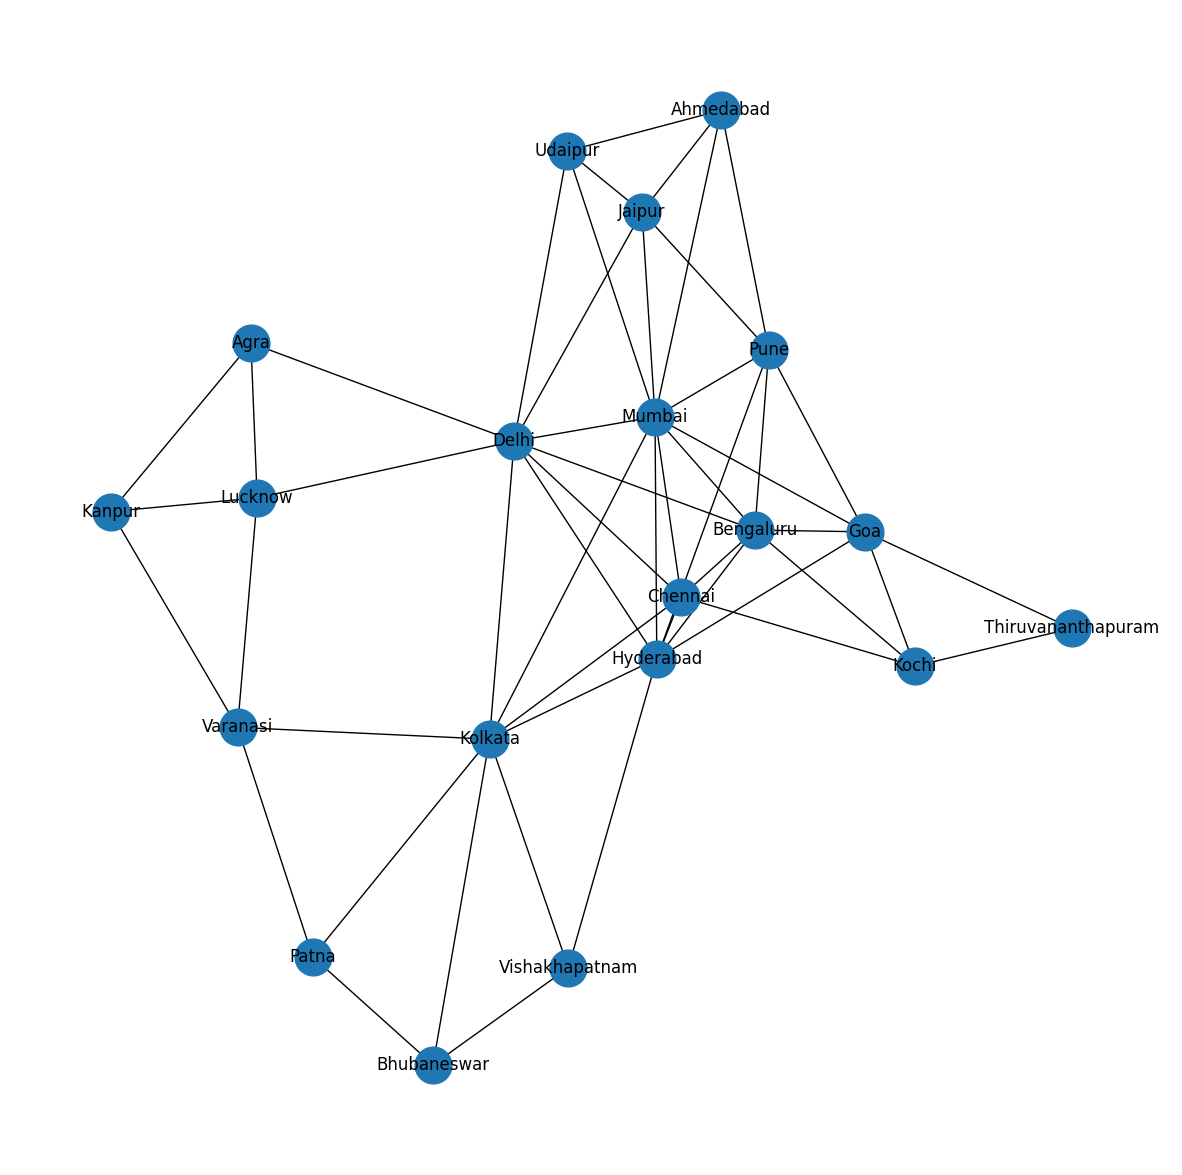

[('Mumbai', 10),
 ('Delhi', 9),
 ('Hyderabad', 8),
 ('Kolkata', 8),
 ('Bengaluru', 7),
 ('Pune', 6),
 ('Chennai', 6),
 ('Goa', 6),
 ('Jaipur', 5),
 ('Lucknow', 4)]

In [ ]:
# Create a graph from the dataframe
# distance is in [] because it will work as an edge attribute. while other 2 are parameters
G = nx.from_pandas_edgelist(df, 'Origin', 'Destination', ['Distance'])

# Draw the graph
#plots a figure of size 15X15 size
plt.figure(figsize=(15, 15))

#Calculates the positions of all nodes in G
pos = nx.spring_layout(G, k=0.15, seed=42)  #K is a parameter that influence the dist between nodes and 'seed' ensure layout is same each time the code runs

#drawing nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

#drawing edges at position 'pos'
nx.draw_networkx_edges(G, pos, width=1)

#drawing labels at position 'pos'
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')


plt.axis('off') #this line disables the axis around the plot
plt.show() #prints the figure

# Identify the cities with the most connections
degree_dict = dict(G.degree(G.nodes())) #the number of edges connected to each node
sorted_degree = sorted(degree_dict.items(), key=lambda item: item[1], reverse=True) #desc order sorting


sorted_degree[:10] # Shows top 10 cities with the most connections


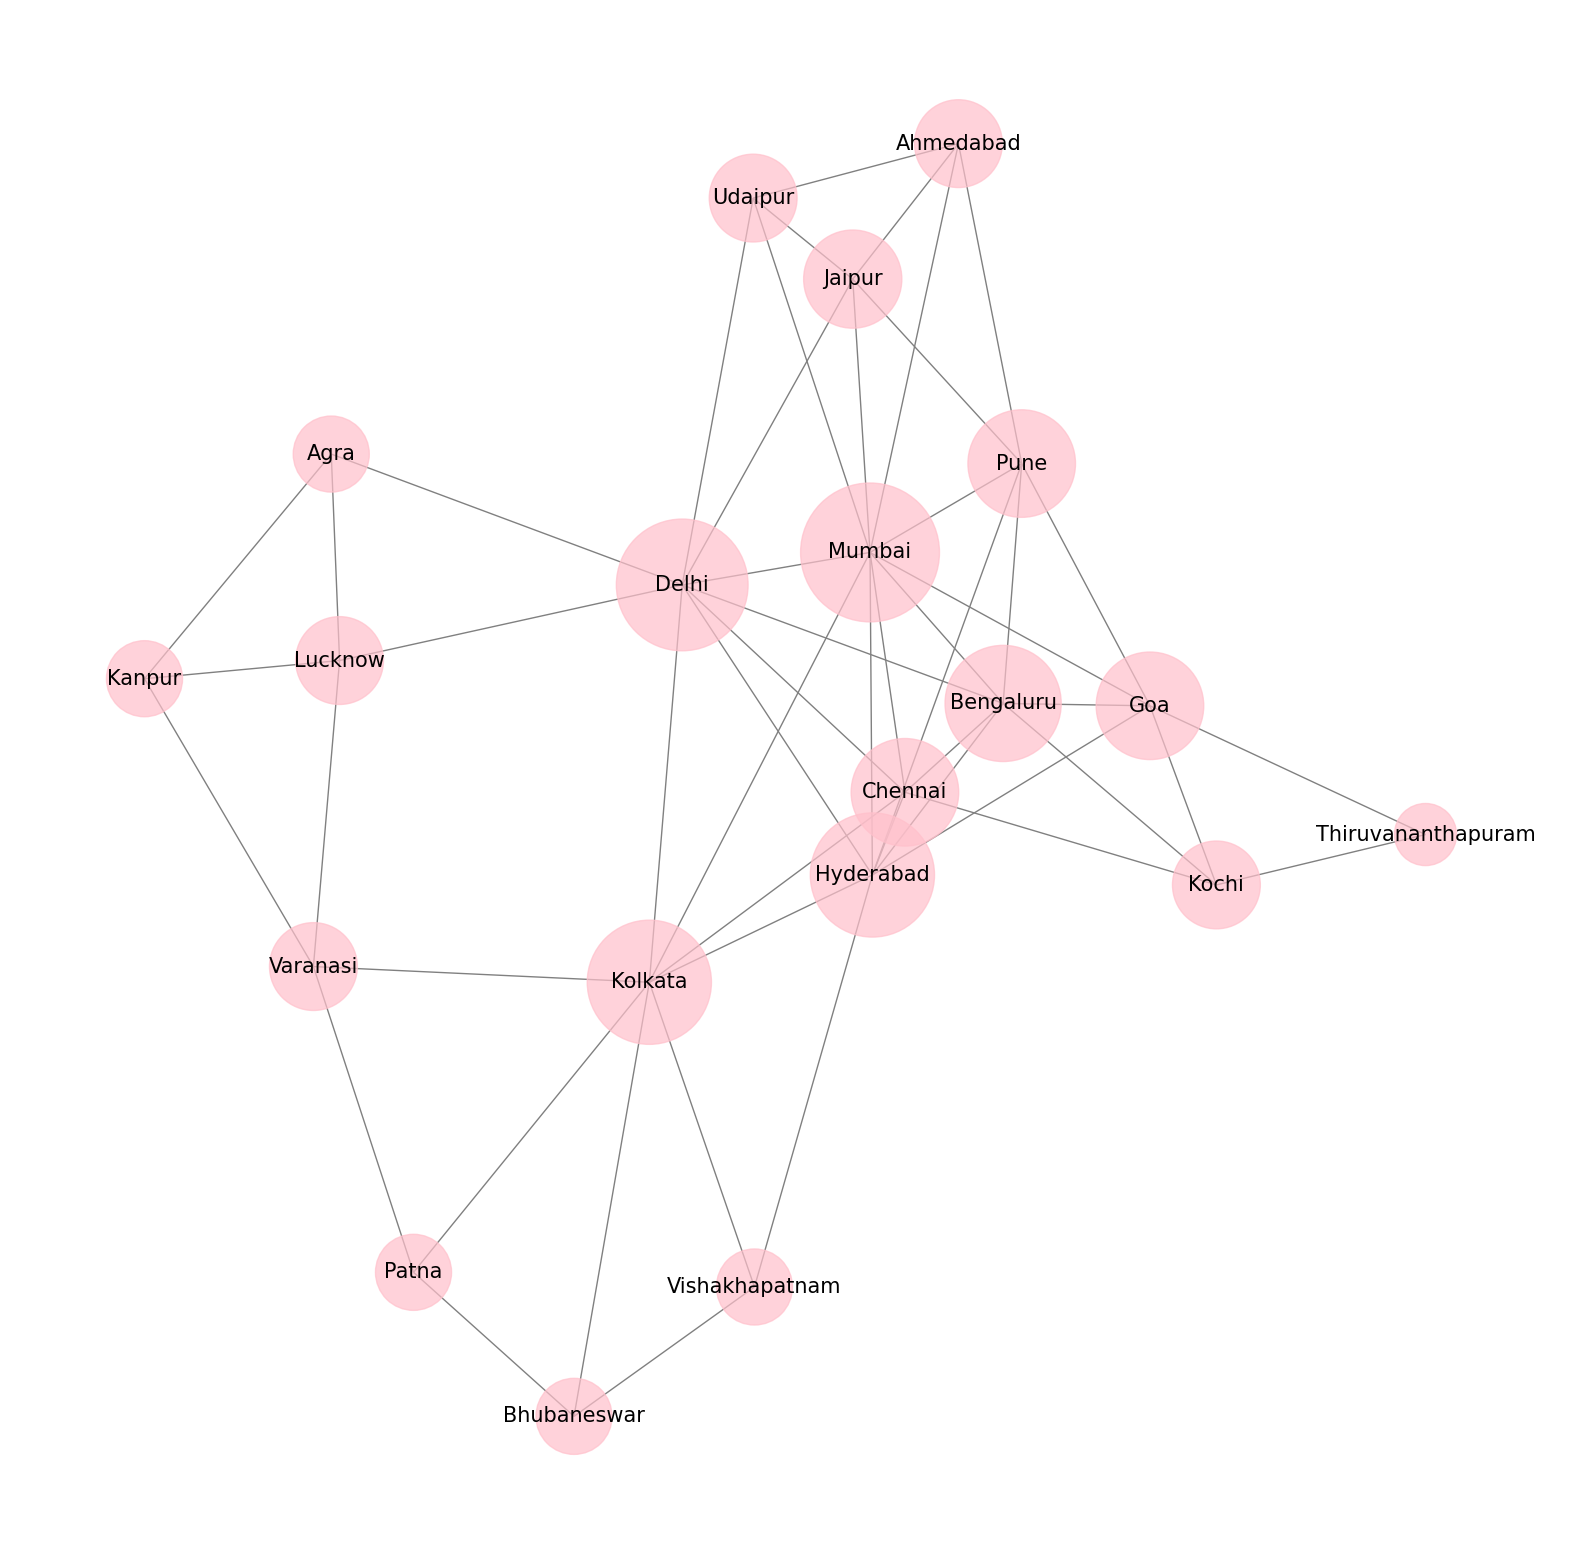

In [ ]:
# Draw the graph with node size corresponding to the number of connections (degree)

# Determine node size by the number of connections, scaled
node_sizes = [v * 1000 for v in degree_dict.values()] # Each degree value is multiplied by 1000 to scale up node size for better figure.

#plotting figure of dimensions 20x20 using matplotlib
plt.figure(figsize=(20, 20))

# Position nodes
pos = nx.spring_layout(G, k=0.15, seed=42)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='pink', alpha=0.7)

# Draw edges
nx.draw_networkx_edges(G, pos, edge_color='gray')

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=15)

# Remove the axis
plt.axis('off')

# Show the graph
plt.show()



In the context of the project. On analyzing distances between Indian cities, the centrality measures are crucial concepts from network theory that help in understanding the importance or influence of different cities (represented as nodes) within the network of cities (the graph).


**Centrality Measures**

**Betweenness Centrality**: Identifies nodes that serve as bridges between different parts of the graph. High betweenness centrality indicates a node with great influence over the spread of information through the network.
Such cities might have significant influence in facilitating or controlling the flow of goods, services, or information across the network.


**Closeness Centrality**: Measures how close a node is to all other nodes in the network, which can indicate how fast it can interact with other nodes.


**Eigenvector Centrality**: It extends the concept of connections by considering not just the number of direct links a node has (like degree centrality) but also the quality of these connections. A node is considered influential if it is connected to many other nodes that are themselves influential.
This could indicate a city that, even if not centrally located, has a significant influence on the network through strategic connections with other major hubs or cities.

In [ ]:
# we will calculate the betweenness centrality, closeness centrality and eigenvector centrality

# Calculate centrality measures
#all these are built in functions of networkx library
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

# We will return the top 5 cities for each centrality measure for brevity
top_betweenness = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)[:5]
top_closeness = sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)[:5]
top_eigenvector = sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)[:5]

# Compile the results into a readable format
analysis_results = {
    "Top Betweenness Centrality": top_betweenness,
    "Top Closeness Centrality": top_closeness,
    "Top Eigenvector Centrality": top_eigenvector,
}

analysis_results

{'Top Betweenness Centrality': [('Delhi', 0.2660550950024634),
  ('Kolkata', 0.26134674292569027),
  ('Mumbai', 0.18097219544587967),
  ('Hyderabad', 0.11475108711950815),
  ('Goa', 0.08753079279395068)],
 'Top Closeness Centrality': [('Mumbai', 0.6551724137931034),
  ('Delhi', 0.6333333333333333),
  ('Hyderabad', 0.6129032258064516),
  ('Kolkata', 0.6129032258064516),
  ('Chennai', 0.5757575757575758)],
 'Top Eigenvector Centrality': [('Mumbai', 0.420178448505168),
  ('Hyderabad', 0.35789021759182316),
  ('Delhi', 0.34769966558047577),
  ('Bengaluru', 0.32605052375707616),
  ('Chennai', 0.2923542047300046)]}

enter start city: 
Varanasi
enter end city: 
Thiruvananthapuram


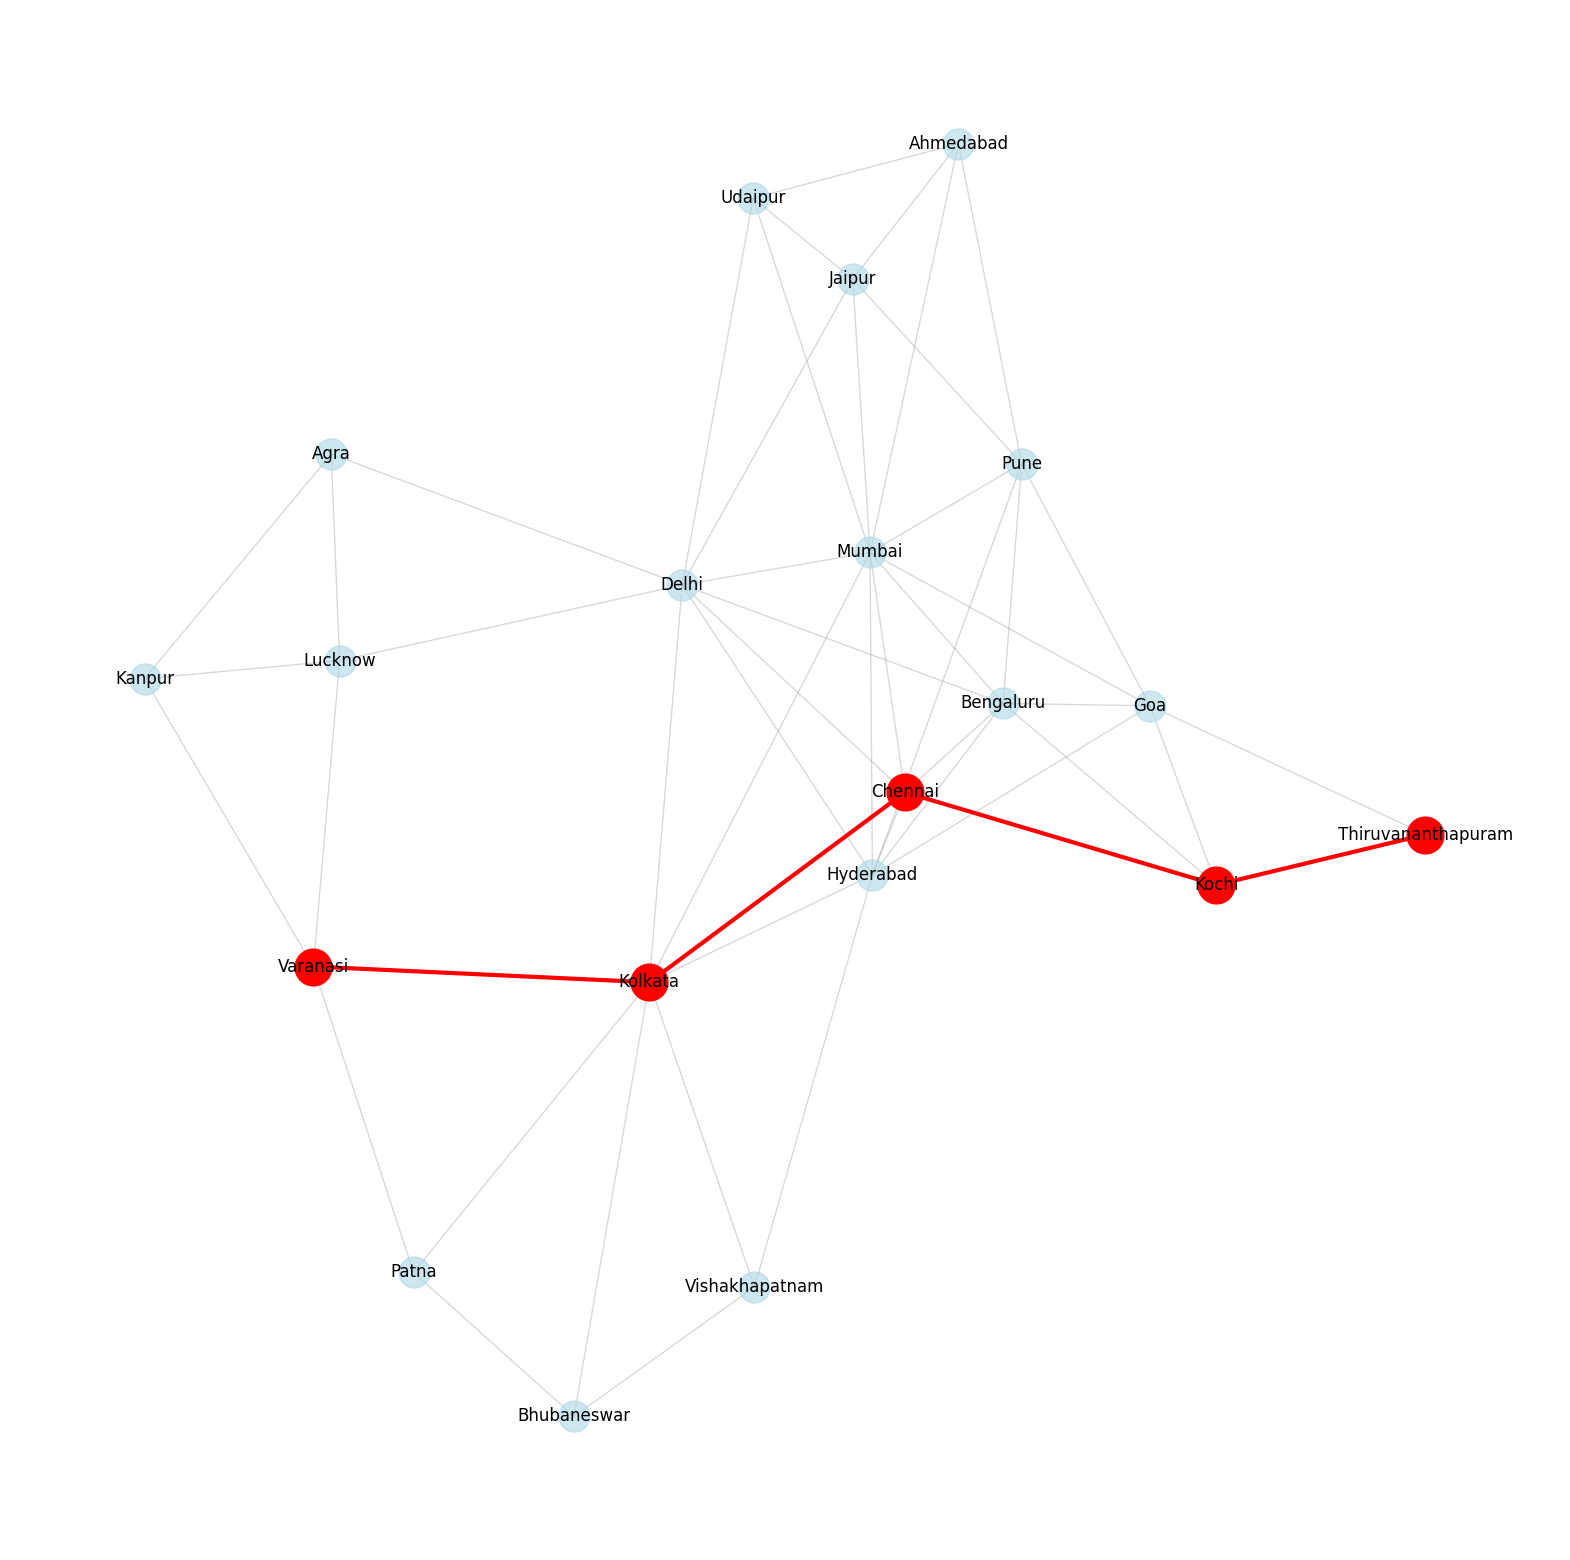

['Varanasi', 'Kolkata', 'Chennai', 'Kochi', 'Thiruvananthapuram']

In [ ]:
# For Path Analysis, we'll focus on finding the shortest path between two major cities.

# For visualization purposes, we will consider the shortest path between Mumbai and Delhi
# which are typically two of the most connected cities in India.

# Calculate the shortest path based on distance

source = input("enter start city: \n")
target = input("enter end city: \n")

try:
    shortest_path = nx.shortest_path(G, source , target, weight='Distance')

   # shortest_path = nx.bellman_ford_path(G, source, target, weight='Distance')
    # Visualization
    plt.figure(figsize=(20, 20))
    pos = nx.spring_layout(G, k=0.15, seed=42)

    # Draw all nodes and edges
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500, alpha=0.6)
    nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.3)
    nx.draw_networkx_labels(G, pos, font_size=12)

    # Draw the shortest path
    path_edges = list(zip(shortest_path, shortest_path[1:]))
    nx.draw_networkx_nodes(G, pos, nodelist=shortest_path, node_color='red', node_size=700)
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)

    plt.axis('off')
    plt.show()

    # Return the shortest path
    shortest_path
except nx.NetworkXNoPath:
    shortest_path = "No path found"
except nx.NodeNotFound:
    shortest_path = "One of the nodes not found in the graph"

shortest_path